In [ ]:
!git clone https://github.com/texttron/tevatron.git

Cloning into 'tevatron'...
remote: Enumerating objects: 2245, done.
remote: Counting objects: 100% (786/786), done.
remote: Compressing objects: 100% (349/349), done.
remote: Total 2245 (delta 580), reused 447 (delta 434), pack-reused 1459 (from 3)
Receiving objects: 100% (2245/2245), 20.92 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (1253/1253), done.


In [ ]:
import os
os.chdir("tevatron/examples/rankllama/")
print(os.listdir("."))

['README.md', 'prepare_rerank_file.py']


In [ ]:
!wget https://www.dropbox.com/scl/fi/xkhy3snts7bixzdqeg4ve/run.repllama.psg.dev.txt?rlkey=nzo68wbyj0xmsjvr0s5d32ano -O run.repllama.psg.dev.txt
!wget https://www.dropbox.com/scl/fi/byty1lk2um36imz0788yd/run.repllama.psg.dl19.txt?rlkey=615ootx2mia42cxdilp4tvqzh -O run.repllama.psg.dl19.txt
!wget https://www.dropbox.com/scl/fi/drgg9vj8mxe3qwayggj9o/run.repllama.psg.dl20.txt?rlkey=22quuq5wzvn6ip0c5ml6ad5cs -O run.repllama.psg.dl20.txt

--2025-04-27 19:20:37--  https://www.dropbox.com/scl/fi/xkhy3snts7bixzdqeg4ve/run.repllama.psg.dev.txt?rlkey=nzo68wbyj0xmsjvr0s5d32ano
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc8730e14b92c3794dc108340c1.dl.dropboxusercontent.com/cd/0/inline/ComUAFLhnG3XsPIEs-i9XDmoIwqpfaJdwpzhj1kbHstBYv1Y35jidPv8NJ0aVpRvd7JZYlO2HRL-CFrfkd8ak6dG45qCGYSIO6RMu_UIcK3l-22XMhaKn0hJJ0i5M0llrmGyo3achWXHwCC8Eabluksx/file# [following]
--2025-04-27 19:20:37--  https://ucc8730e14b92c3794dc108340c1.dl.dropboxusercontent.com/cd/0/inline/ComUAFLhnG3XsPIEs-i9XDmoIwqpfaJdwpzhj1kbHstBYv1Y35jidPv8NJ0aVpRvd7JZYlO2HRL-CFrfkd8ak6dG45qCGYSIO6RMu_UIcK3l-22XMhaKn0hJJ0i5M0llrmGyo3achWXHwCC8Eabluksx/file
Resolving ucc8730e14b92c3794dc108340c1.dl.dropboxusercontent.com (ucc8730e14b92c3794dc108340c1.dl.dropboxusercontent.com)... 162.125.

In [ ]:
!pip install datasets
!pip install flash-attn --no-build-isolation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [ ]:
from huggingface_hub import login

login()

In [ ]:
!python prepare_rerank_file.py \
    --query_data_name Tevatron/msmarco-passage \
    --query_data_split dl19 \
    --corpus_data_name Tevatron/msmarco-passage-corpus \
    --retrieval_results run.repllama.psg.dl19.txt \
    --output_path rerank_input.repllama.psg.dl19.jsonl \
    --depth 200

msmarco-passage.py: 100% 4.29k/4.29k [00:00<00:00, 22.5MB/s]
0000.parquet: 100% 288M/288M [00:01<00:00, 226MB/s]
0001.parquet: 100% 287M/287M [00:01<00:00, 244MB/s]
0002.parquet: 100% 288M/288M [00:01<00:00, 263MB/s]
0003.parquet: 100% 288M/288M [00:01<00:00, 223MB/s]
0004.parquet: 100% 288M/288M [00:01<00:00, 201MB/s]
0005.parquet: 100% 288M/288M [00:01<00:00, 198MB/s]
0006.parquet: 100% 288M/288M [00:01<00:00, 254MB/s]
0007.parquet: 100% 288M/288M [00:01<00:00, 236MB/s]
0008.parquet: 100% 288M/288M [00:01<00:00, 240MB/s]
0009.parquet: 100% 156M/156M [00:00<00:00, 254MB/s]
0000.parquet: 100% 242k/242k [00:00<00:00, 282MB/s]
0000.parquet: 100% 5.99k/5.99k [00:00<00:00, 41.7MB/s]
0000.parquet: 100% 6.52k/6.52k [00:00<00:00, 44.7MB/s]
Generating train split: 100% 400782/400782 [00:16<00:00, 24728.27 examples/s]
Generating dev split: 100% 6980/6980 [00:00<00:00, 1077838.23 examples/s]
Generating dl19 split: 100% 43/43 [00:00<00:00, 18456.31 examples/s]
Generating dl20 split: 100% 54/54 [0

In [ ]:
!python prepare_rerank_file.py \
    --query_data_name Tevatron/msmarco-passage \
    --query_data_split dl20 \
    --corpus_data_name Tevatron/msmarco-passage-corpus \
    --retrieval_results run.repllama.psg.dl20.txt \
    --output_path rerank_input.repllama.psg.dl20.jsonl \
    --depth 200

100% 54/54 [00:00<00:00, 21564.54it/s]
100% 8841823/8841823 [04:29<00:00, 32780.35it/s]
100% 54/54 [00:00<00:00, 674.38it/s]


In [ ]:
import sys
sys.path.append('/content/tevatron/src')

In [ ]:
import torch
with torch.no_grad():
    torch.cuda.empty_cache()

In [ ]:
# 1. Install & import
!pip install llmlingua

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00


In [ ]:
!ls

prepare_rerank_file.py	run.repllama.psg.dev.txt   run.repllama.psg.dl20.txt
README.md		run.repllama.psg.dl19.txt


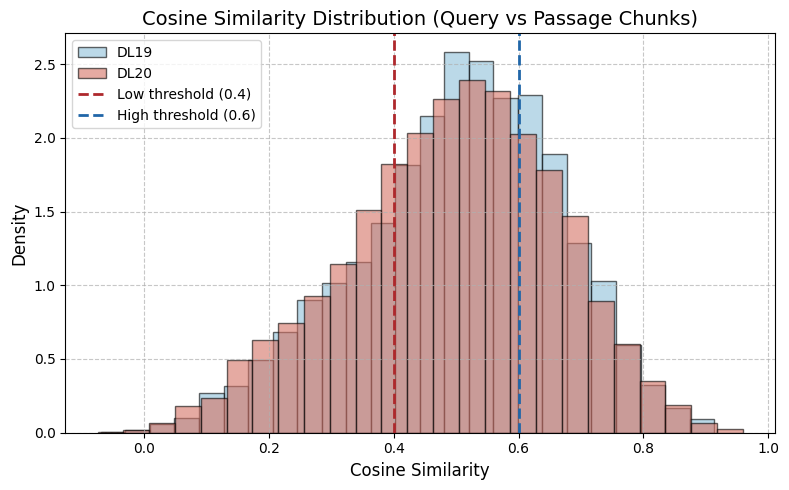

DL19 Mean: 0.5035 | Median: 0.5167 | Std: 0.1637
DL20 Mean: 0.4933 | Median: 0.5050 | Std: 0.1689


In [ ]:

plt.figure(figsize=(8, 5))

plt.hist(all_similarities, bins=25, color='#8ec1da', edgecolor='black', alpha=0.6, density=True, label="DL19")
plt.hist(all_similarities_2, bins=25, color='#d47264', edgecolor='black', alpha=0.6, density=True, label="DL20")


plt.axvline(x=0.4, color='#ae282c', linestyle='--', linewidth=2, label='Low threshold (0.4)')
plt.axvline(x=0.6, color='#2066a8', linestyle='--', linewidth=2, label='High threshold (0.6)')

plt.title("Cosine Similarity Distribution (Query vs Passage Chunks)", fontsize=14)
plt.xlabel("Cosine Similarity", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='upper left')
plt.tight_layout()


plt.savefig("cosine_similarity_distribution.pdf", dpi=300)


plt.show()


print(f"DL19 Mean: {all_similarities.mean():.4f} | Median: {np.median(all_similarities):.4f} | Std: {all_similarities.std():.4f}")
print(f"DL20 Mean: {all_similarities_2.mean():.4f} | Median: {np.median(all_similarities_2):.4f} | Std: {all_similarities_2.std():.4f}")


In [ ]:


from llmlingua import PromptCompressor
import json
from sentence_transformers import SentenceTransformer, util


embedder = SentenceTransformer("all-MiniLM-L6-v2")

def chunk_similarities(chunks: list[str], query: str):
    query_emb = embedder.encode(query, convert_to_tensor=True)
    chunk_embs = embedder.encode(chunks, convert_to_tensor=True)

    sims = util.cos_sim(query_emb, chunk_embs)[0]
    return sims.tolist()

def sim_to_rate(sim: float,
                low_thresh=0.3, low_rate=0.5,
                high_thresh=0.7, high_rate=0.9):
    if sim >= high_thresh:
        return high_rate
    if sim <= low_thresh:
        return low_rate
    alpha = (sim - low_thresh) / (high_thresh - low_thresh)
    return low_rate + alpha * (high_rate - low_rate)


compressor = PromptCompressor()
rate = 0.80


in_path  = "rerank_input.repllama.psg.dl19.jsonl"
out_path = "rerank_input_compressed.dl19.jsonl"

with open(in_path, "r") as fin, open(out_path, "w") as fout:
    for line in fin:
        entry = json.loads(line)
        context_lines=entry["text"].split("\n")
        sims = chunk_similarities(context_lines, entry["query"])

        struct = ""
        for chunk, sim in zip(context_lines, sims):
            rate = sim_to_rate(sim)
            struct += f"<llmlingua, rate={rate:.2f}>{chunk}</llmlingua>\n"


        comp = compressor.structured_compress_prompt(
            struct,
            instruction="",
            question=entry["query"],
            rate=0.8,
            use_token_level_filter=False
        )
        entry["text"] = comp["compressed_prompt"]
        fout.write(json.dumps(entry, ensure_ascii=False) + "\n")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import gc
gc.collect()

122

In [ ]:
!PYTHONPATH=/content/tevatron/src CUDA_VISIBLE_DEVICES=0 python -m tevatron.reranker.driver.rerank \
  --output_dir=temp \
  --model_name_or_path castorini/rankllama-v1-7b-lora-passage \
  --tokenizer_name meta-llama/Llama-2-7b-hf \
  --dataset_path rerank_input_compressed.dl19.jsonl \
  --fp16 \
  --per_device_eval_batch_size 64 \
  --rerank_max_len 196 \
  --dataset_name json \
  --query_prefix "query: " \
  --passage_prefix "document: " \
  --rerank_output_path run.rankllama.psg.dl19.compressed.txt

2025-04-21 17:08:10.023983: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 17:08:10.041014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745255290.062167    2464 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745255290.068600    2464 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-21 17:08:10.090108: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [ ]:
!ls

prepare_rerank_file.py		       run.repllama.psg.dev.txt
README.md			       run.repllama.psg.dl19.txt
rerank_input_compressed.dl19.jsonl     run.repllama.psg.dl20.txt
run.rankllama.psg.dl19.compressed.txt


In [ ]:
!PYTHONPATH=/content/tevatron/src python -m tevatron.utils.format.convert_result_to_trec \
              --input  run.rankllama.psg.dl19.compressed.txt \
              --output run.rankllama.psg.dl19.compressed.trec

In [ ]:
!pip install pyserini

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00
  Created wheel for pyserini: filename=pyserini-0.44.0-py3-none-any.whl size=195388880 sha256=c4e7758f1fb722a8890b665e7527f9f1606a68bda3d5e63d9a7f5bce4b4b12d0
  Stored in directory: /root/.cache/pip/wheels/4d/fb/2c/523bde7d33a5dd4d0da19070ad3c96113f2b0face35a863f25
Successfully built pyserini


In [ ]:
%%bash
# 1) Install a newer JDK (you can pick 17 or 21; here we pick 21)
sudo apt-get update -qq
sudo apt-get install -y openjdk-21-jdk-headless

# 2) Tell the system to use it by default
sudo update-alternatives --install /usr/bin/java java /usr/lib/jvm/java-21-openjdk-amd64/bin/java 2000
sudo update-alternatives --set java /usr/lib/jvm/java-21-openjdk-amd64/bin/java

# 3) Sanity‑check
java -version

# 4) Now run your Pyserini eval
python -m pyserini.eval.trec_eval \
       -c \
       -m ndcg_cut.10 \
       dl19-passage \
       run.rankllama.psg.dl19.compressed.trec


Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  openjdk-21-jre-headless
Suggested packages:
  openjdk-21-demo openjdk-21-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-21-jdk-headless openjdk-21-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 41 not upgraded.
Need to get 129 MB of archives.
After this operation, 299 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-21-jre-headless amd64 21.0.6+7-1~22.04.1 [46.8 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-21-jdk-headless amd64 21.0.6+7-1~22.04.1 [82.6 MB]
Fetched 129 MB in 12s (10.6 MB/s)
Selecting previously unselected package openjdk-21-jre-headless:amd64.
(Reading database ... 126332 files an

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
update-alternatives: warning: forcing reinstallation of alternative /usr/lib/jvm/java-21-openjdk-amd64/bin/java because link group java is broken
openjdk version "21.0.6" 2025-01-21
OpenJDK Runtime Environment (build 21.0.6+7-Ubuntu-122.04.1)
OpenJDK 64-Bit Server VM (build 21.0.6+7-Ubuntu-122.04.1, mixed mode, sharing)


In [ ]:
!python -m pyserini.eval.trec_eval -c -m ndcg_cut.10 dl19-passage run.rankllama.psg.dl19.compressed.trec

ndcg_cut_10           	all	0.7122
